In [1]:
import matplotlib.pyplot as plt
import os
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def heatThisLog(h5File):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.ylabel('Gamma')
    plt.xlabel('Theta')
    #plt.imshow(qp.abs2(wf), vmax = 1e-30)
    plt.imshow(np.log(qp.abs2(wf)))

def heatThis(h5File):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.ylabel('Gamma')
    plt.xlabel('Theta')
    #plt.imshow(qp.abs2(wf), vmax = 1e-30)
    plt.imshow(qp.abs2(wf))
    
def f(x):
    return heatThis(os.path.join(a,filesList[x]))

In [11]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> input2_0000
1 -> input2_0001
2 -> input2_0002
3 -> input2_0003
4 -> input2_0004
5 -> input2_0005
6 -> input2_0006
7 -> input2_0007
8 -> input2_0008



In [12]:
a=subfolders[-1]
a

'input2_0008'

In [13]:
filesList = sorted(os.listdir(a))

In [14]:
interact(f, x = widgets.IntSlider(min=0,max=(len(filesList)-1),step=1,value=0))

interactive(children=(IntSlider(value=0, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(x)>

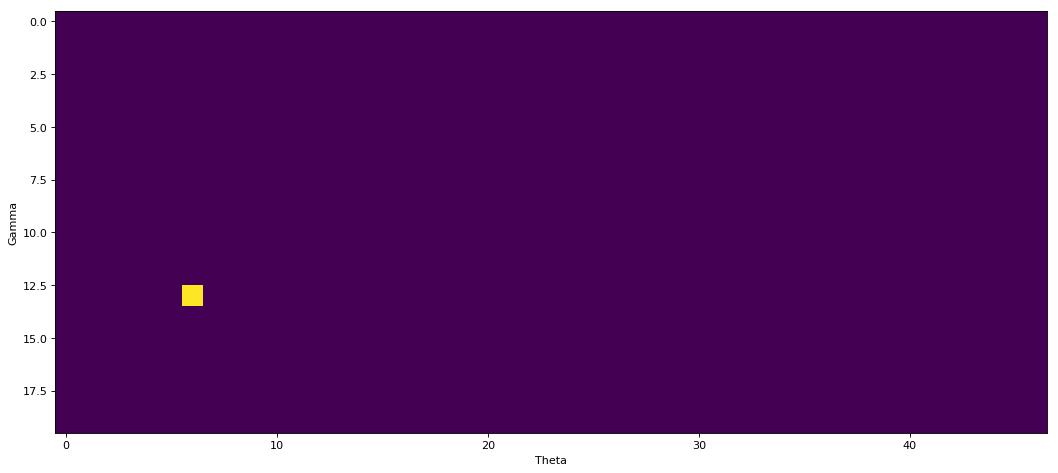

In [19]:
f(0)

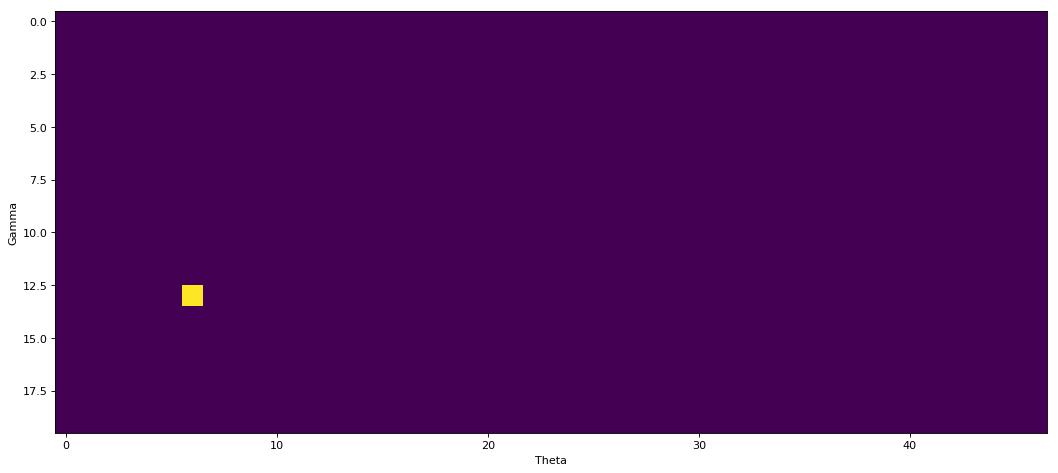

In [20]:
f(1)

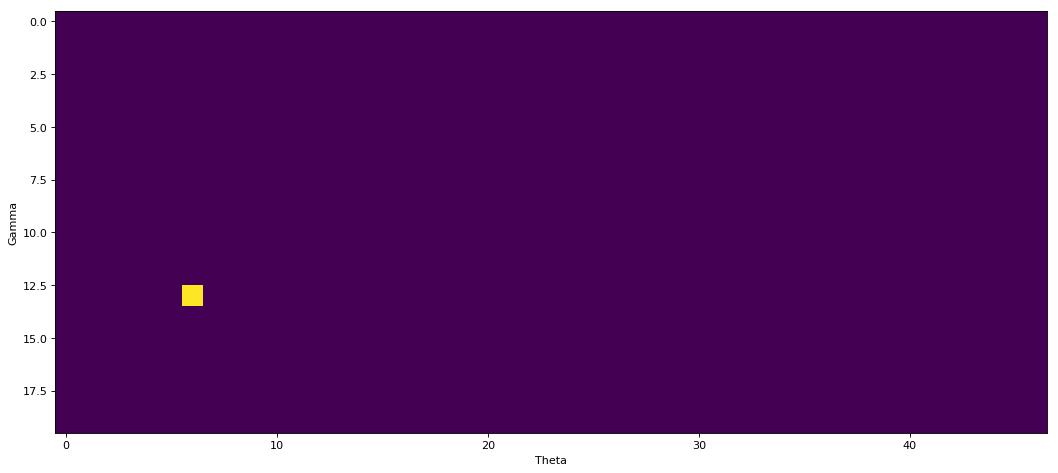

In [21]:
f(398)